### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Diabetes Dataset

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check for Outliers and Autocorrelation between Independent Variables

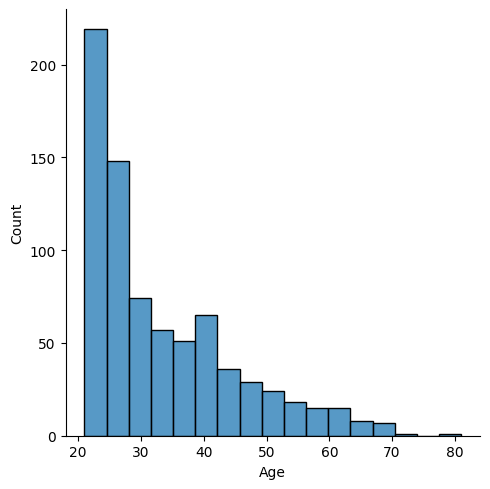

In [5]:
sns.displot(df['Age'])

<Axes: >

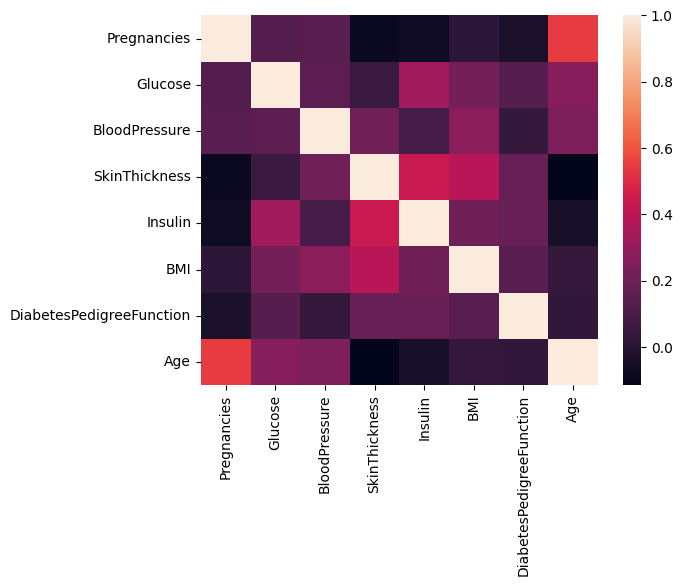

In [6]:
sns.heatmap(df.drop(['Outcome'],axis=1).corr())

### Preprocessing the data (Min-Max Scaling)

In [7]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [9]:
X['BMI'] = MinMaxScaler().fit_transform(X[['BMI']])
X['Age'] = MinMaxScaler().fit_transform(X[['Age']])
X['BloodPressure'] = MinMaxScaler().fit_transform(X[['BloodPressure']])
X['SkinThickness'] = MinMaxScaler().fit_transform(X[['SkinThickness']])
X['Insulin'] = MinMaxScaler().fit_transform(X[['Insulin']])
X['Glucose'] = MinMaxScaler().fit_transform(X[['Glucose']])

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000


### Split Data into Train and Test sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [14]:
X_test.shape,y_test.shape

((154, 8), (154,))

### Trying Different models

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#### Random Forest Classifier

In [16]:
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
rfr.score(X_test,y_test)

0.7467532467532467

#### Support Vector Classifier

In [18]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [19]:
svc.score(X_test,y_test)

0.6688311688311688

#### Decision Tree Classifier

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
dtc.score(X_test,y_test)

0.7792207792207793

#### KNeighbors Classifier

In [22]:
knc = KNeighborsClassifier(n_neighbors=20)

In [23]:
knc.fit(X_train,y_train)
knc.score(X_test,y_test)

0.7012987012987013

From the above results we have concluded that DecisionTreeClassifier, RandomForestClassifier and KNeighbors classifier are performing better than others with 73%, 77% and 70% accuracy respectively. Now we will use hyperparameter tuning and K-Fold cross-validation to decide which model is the best.

### K-Fold Cross-Validation and Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

#### 1. Kneighbors Classifier model

In [25]:
knc_gsv = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[10,20,30,40]},cv=5)

In [26]:
knc_gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 20, 30, 40]})

In [27]:
pd.DataFrame(knc_gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001602,0.000487,0.006203,0.000992,10,{'n_neighbors': 10},0.642276,0.756098,0.682927,0.723577,0.639344,0.688844,0.045570,2
1,0.001786,0.000393,0.005609,0.000496,20,{'n_neighbors': 20},0.674797,0.707317,0.699187,0.699187,0.663934,0.688884,0.016571,1
2,0.001612,0.000488,0.005796,0.000397,30,{'n_neighbors': 30},0.666667,0.682927,0.699187,0.699187,0.663934,0.682380,0.015182,3
3,0.001598,0.000489,0.005799,0.000400,40,{'n_neighbors': 40},0.666667,0.691057,0.707317,0.658537,0.672131,0.679142,0.017693,4


#### 1. Random Forest Classifier Model

In [28]:
rfc_gsv = GridSearchCV(RandomForestClassifier(),{'n_estimators':[20,50,100,150],'criterion':['gini','entropy']},cv=5)

In [29]:
rfc_gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 50, 100, 150]})

In [30]:
pd.DataFrame(rfc_gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030802,0.000987,0.002596,0.000499,gini,20,"{'criterion': 'gini', 'n_estimators': 20}",0.739837,0.788618,0.747967,0.731707,0.762295,0.754085,0.020006,8
1,0.076801,0.003062,0.003800,0.000400,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",0.788618,0.764228,0.739837,0.739837,0.786885,0.763881,0.021436,7
2,0.152000,0.002827,0.006199,0.000398,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.756098,0.829268,0.739837,0.731707,0.811475,0.773677,0.039331,3
3,0.224999,0.005934,0.008600,0.000799,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.772358,0.813008,0.739837,0.739837,0.786885,0.770385,0.028140,4
4,0.035000,0.001999,0.002399,0.000489,entropy,20,"{'criterion': 'entropy', 'n_estimators': 20}",0.739837,0.821138,0.780488,0.707317,0.778689,0.765494,0.038828,6
5,0.083206,0.003301,0.004001,0.000633,entropy,50,"{'criterion': 'entropy', 'n_estimators': 50}",0.780488,0.804878,0.764228,0.756098,0.786885,0.778515,0.017179,1
6,0.155588,0.003013,0.006012,0.000015,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.764228,0.804878,0.756098,0.739837,0.811475,0.775303,0.028044,2
7,0.229396,0.002423,0.008402,0.000486,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.772358,0.821138,0.747967,0.747967,0.754098,0.768706,0.027698,5


#### 1. Decision Tree Classifier Model

In [31]:
dtc_gsv = GridSearchCV(DecisionTreeClassifier(),{'max_depth':[2,4,6,8],'criterion':['gini','entropy']},cv=5)

In [32]:
dtc_gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [33]:
pd.DataFrame(dtc_gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002198,0.000749,0.001000,5.840039e-07,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.699187,0.813008,0.764228,0.723577,0.778689,0.755738,0.040277,1
1,0.002409,0.000494,0.001004,1.423692e-05,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.739837,0.788618,0.756098,0.739837,0.754098,0.755698,0.017830,2
2,0.002799,0.000401,0.001001,1.243439e-06,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.747967,0.772358,0.674797,0.731707,0.688525,0.723071,0.036462,7
3,0.003593,0.000497,0.001007,1.222267e-05,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.731707,0.764228,0.674797,0.739837,0.704918,0.723097,0.030690,6
4,0.001807,0.000403,0.000987,1.655044e-05,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.699187,0.756098,0.715447,0.723577,0.737705,0.726403,0.019382,5
5,0.002592,0.000485,0.001001,1.200645e-06,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.739837,0.804878,0.731707,0.723577,0.770492,0.754098,0.029945,3
6,0.003193,0.000387,0.001213,3.921470e-04,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.699187,0.772358,0.764228,0.715447,0.704918,0.731228,0.030817,4
7,0.003600,0.000491,0.000993,1.241829e-05,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.715447,0.837398,0.666667,0.731707,0.663934,0.723031,0.063059,8


### Summary

In [34]:
from sklearn.metrics import confusion_matrix 

In [35]:
knc = KNeighborsClassifier(n_neighbors=20)
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2)
rfc = RandomForestClassifier(criterion='entropy',n_estimators=100)

In [36]:
knc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [37]:
preds_knc = knc.predict(X_test)
preds_dtc = dtc.predict(X_test)
preds_rfc = rfc.predict(X_test)

#### Confusion Matrix of KNeighbors Classifier

In [38]:
confusion_matrix(preds_knc,y_test)

array([[93, 40],
       [ 6, 15]], dtype=int64)

#### Confusion Matrix of Decision Tree Classifier

In [39]:
confusion_matrix(preds_dtc,y_test)

array([[87, 23],
       [12, 32]], dtype=int64)

#### Confusion Matrix of Random Forest Classifier

In [40]:
confusion_matrix(preds_rfc,y_test)

array([[78, 19],
       [21, 36]], dtype=int64)

In [41]:
knc.score(X_test,y_test)

0.7012987012987013

In [42]:
dtc.score(X_test,y_test)

0.7727272727272727

In [43]:
rfc.score(X_test,y_test)

0.7402597402597403

Decision Tree Classifier is the best fit for this application